# Determinando indicadores de trafégo pesado na autoestrada I-94 highway

O Dataset usado foi elabora por John Hogue e está disponível para uso no UCI Machine Learning Repository.

O projeto tem como propósito investigar possiveis causas do trânsito pesado em uma autoestrada.

## Passo 1
Importacões das bibliotecas para análise preliminar dos dados.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Essas linhas de código importam as bibliotecas necessárias para análise de dados e visualização.

In [17]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(df.head(5))
print(df.tail(5))
df.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   


Essas linhas de código carregam um arquivo CSV chamado "Metro_Interstate_Traffic_Volume.csv" em um DataFrame do pandas, exibem as primeiras e últimas linhas do DataFrame e fornecem informações sobre o DataFrame.

# Passo 2
Analisando a coluna de tráfego de volume. 

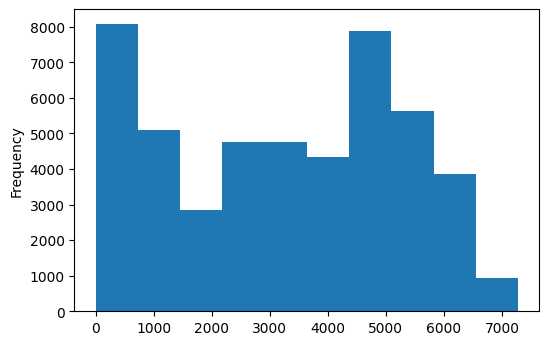

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [18]:
df["traffic_volume"].plot.hist()
plt.show()

trafic_vol = df["traffic_volume"]
trafic_vol.describe()

Essas linhas de código geram um histograma da coluna "traffic_volume" do DataFrame df e exibem estatísticas descritivas para essa coluna.

## Passo 3
Existe uma possibilidade de que o período noturno e diurno possa influenciar o volume de tráfego, sendo interessante para a nossa análise comparar dados do período diurno com noturno. Assim, vamos separar o dataframe em dois, um para dados durante o dia e outro para dados durante a noite.

In [19]:
# transformando a columa date_time para o tipo de data
df["date_time"] = pd.to_datetime(df["date_time"])

Essa linha de código converte a coluna "date_time" do DataFrame df para o tipo de dado de data (datetime).

In [20]:
df["date_time"].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

Essa linha de código extrai a hora (no formato de 24 horas) da coluna "date_time" do DataFrame df.

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
day = df.copy()[(df["date_time"].dt.hour >= 7) & (df["date_time"].dt.hour < 19)]
print(day.shape)

(23877, 9)


Essas linhas de código criam um novo DataFrame chamado "day" contendo apenas as linhas do DataFrame original df que correspondem ao período entre 7h e 18h59. Em seguida, é exibida a forma (shape) do DataFrame "day", que indica o número de linhas e colunas presentes no DataFrame.

In [23]:
df_day = df.copy()[(df["date_time"].dt.hour >= 7) & (df["date_time"].dt.hour < 19)]
df_night = df.copy()[(df["date_time"].dt.hour < 7) | (df["date_time"].dt.hour >= 19)]

print(df_day.shape)
print(df_night.shape)

(23877, 9)
(24327, 9)



Essas linhas de código criam dois novos DataFrames, "df_day" e "df_night", com base em condições de filtragem relacionadas às horas do dia. Em seguida, são exibidas as formas (shapes) de cada DataFrame, que indicam o número de linhas e colunas presentes em cada um.

## Passo 4 
Analisando os novos dataframes individualmente 

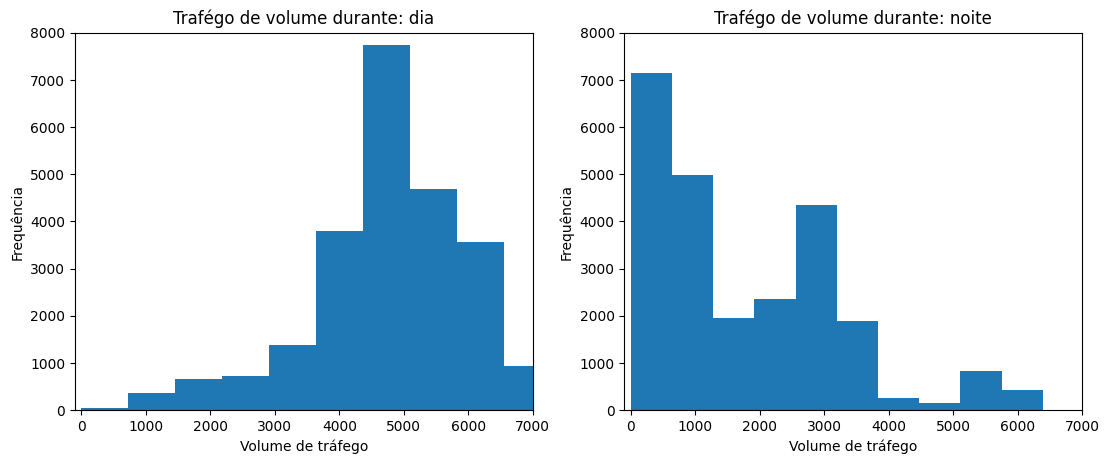

In [24]:
plt.figure(figsize=[13, 5])
dfs = [df_day, df_night]
for i, title in zip(range(0, 2, 1), ["dia", "noite"]):
    plt.subplot(1, 2, i + 1)
    plt.hist(dfs[i]["traffic_volume"])
    plt.title(f"Trafégo de volume durante: {title}")
    plt.xlabel("Volume de tráfego")
    plt.ylabel("Frequência")
    plt.ylim(0, 8000)
    plt.xlim(-100, 7000)

plt.show()

Gera um gráfico de histograma comparando o volume de tráfego durante o dia e a noite. 

In [25]:
dfs[0]["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [26]:
dfs[1]["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

A partir dos gráficos e da descrição estatística de cada dataframe, observamos que o volume de tráfego é baixo durante a noite, uma vez que a frequência de trafégo se concentra em valores baixos.

Logom, o periodo da noite não contribuirá para achar um indicador de trafégo pesado visto que o trafégo pesado ocorre pelo período do dia.

## Passo 5 

Podemos analisar o tempo de uma outra ótica de tempo sendo:
- meses;
- dias da semanas;

Ressaltando que não iremos mais trabalhar com os dados de trafégo da noite. Vamos analisar a média de trafégo por mês e por dias da semana.

In [27]:
df_day["month"] = df_day["date_time"].dt.month
by_month = df_day.groupby("month").mean()
by_month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

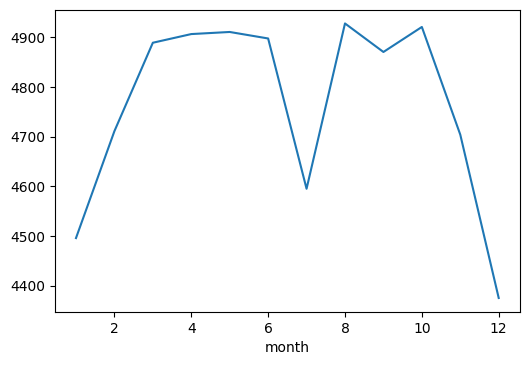

In [28]:
by_month["traffic_volume"].plot.line()

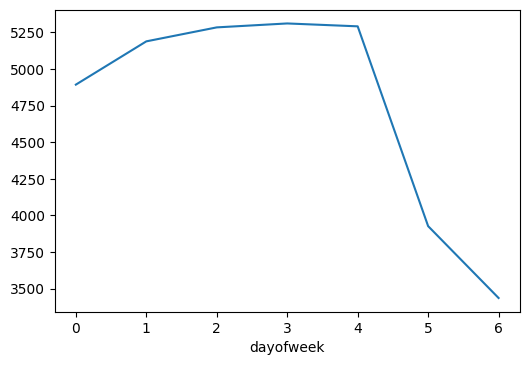

In [32]:
df_day["dayofweek"] = df_day["date_time"].dt.dayofweek
by_dayofweek = df_day.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"]  # 0 is Monday, 6 is Sunday
by_dayofweek["traffic_volume"].plot.line()

- Segunda: 0
- Terça: 1
- Quarta: 2
- Quinta: 3
- Sexta: 4
- Sábado: 5
- Domingo: 6

Por uma nova ótica, temos que:

- Existe um volume de tráfego maior entre os meses de março a junho e de agosto a novembro.

- O volume de trafégo é muito maior durante os dias da semana(segunda a sexta).

Já existem indicadores de sazonalidade em nossos dados, contudo a compreensão útil para a análise é que os dias úteis da semana possuem maior trafégo que os fins de semana, logo podemos observar esses dois conjuntos mais detalhadamente

In [39]:
bussiness_days = df_day.copy()[df_day["dayofweek"] <= 4]  # 4 == Friday
weekend = df_day.copy()[df_day["dayofweek"] >= 5]  # 5 == Saturday

print(bussiness_days["dayofweek"])

0        1
1        1
2        1
3        1
4        1
        ..
48143    4
48144    4
48145    4
48146    4
48147    4
Name: dayofweek, Length: 17085, dtype: int64


## Passo 6 

Volume de tráfego por horário do dia

In [40]:
df_day["hour"] = df_day["date_time"].dt.hour

by_hour_business = bussiness_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

print(by_hour_business["traffic_volume"])

print(by_hour_weekend["traffic_volume"])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [41]:
by_hour_business

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957
12,282.832763,0.090271,0.001543,53.855714,4855.382143,6.569286,1.989286
13,283.292447,0.092433,0.000370,53.325444,4859.180473,6.465237,1.982988
14,284.091787,0.102991,0.000746,55.326531,5152.995778,6.588318,1.990852
15,284.450605,0.090036,0.000274,54.168467,5592.897768,6.541397,1.962563


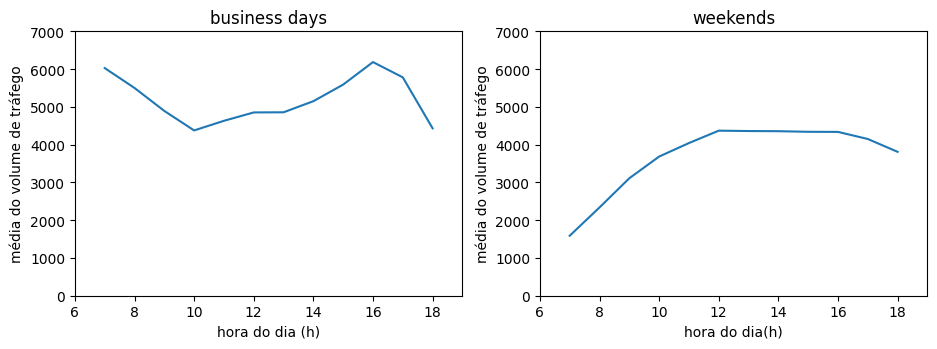

In [62]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
plt.plot(
    by_hour_business.index,
    by_hour_business["traffic_volume"],
)
plt.title("business days")
plt.xlim(6, 19)
plt.ylim(0, 7000)
plt.xlabel("hora do dia (h)")
plt.ylabel("média do volume de tráfego")

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend.index, by_hour_weekend["traffic_volume"])
plt.title("weekends")
plt.xlim(6, 19)
plt.ylim(0, 7000)
plt.xlabel("hora do dia(h)")
plt.ylabel("média do volume de tráfego")

plt.show()

Para os dias úteis da semana existem dois pontos de máximo trafégo, representando o horário em que a maiora das pessoas vai e volta do emprego. Já para o fim de semana temos uma curva suave, sem nenhum ponto notável.

## Passo 7 

Unindo as hipóteses de investigação:
- O volume de tráfego é maior durante o dia;
- O volume de tráfego é maior entre os meses de março a junho e de agosto a novembro e diminui nos períodos de férias;
- O volume de tráfego é maior nos dias da semana;
- O volume de tráfego é maior na hora do rush para ir e voltar do trabalho;


## Passo 8

Analisando outros fatores

Avaliando somente os fatores de tempo do volume de tráfego achamos hipóteses interessantes, contudo é preciso analisar outros características como o clima e tempo e como eles estão correlacionados com o volume de tráfego.

In [63]:
df_day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

A correlação entre fatores climáticos e o voluem de trafégo não mostra nenhum correlação interessante.

## Passo 9 

Vamos analisar a descrição do clima em relação ao clima principal, para termos uma outra ótica dos fatores climáticos.

In [64]:
by_weather_main = df_day.groupby("weather_main").mean()
by_weather_description = df_day.groupby("weather_description").mean()

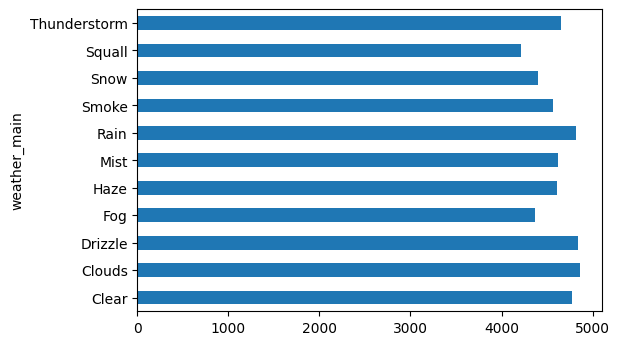

In [70]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

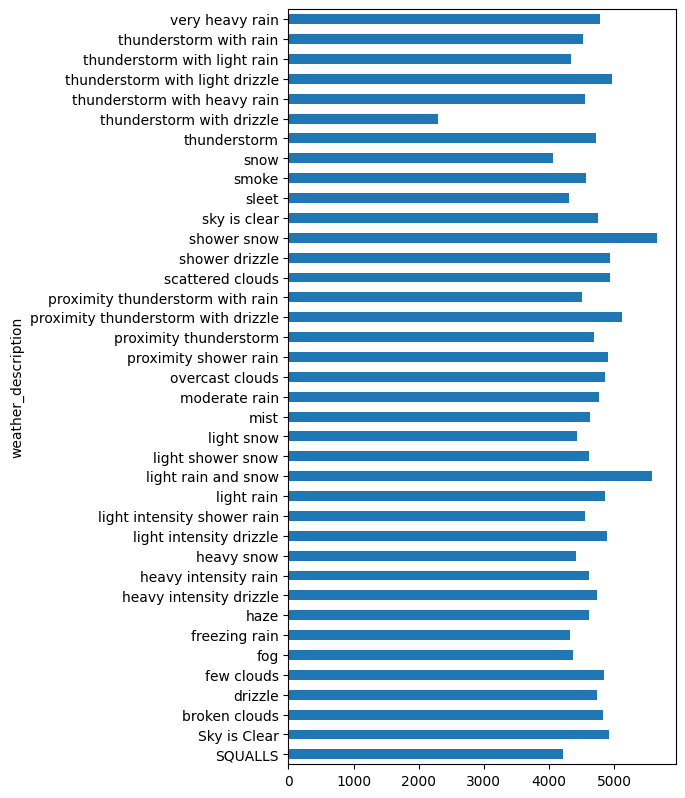

In [74]:
by_weather_description["traffic_volume"].plot.barh(figsize=(5, 10))
plt.show()


Podemos observar três climas que fazem o volume de tráfego exceder 5 mil veículos:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle


# Conclusão

Ao buscarmos causa para o grande volume de tráfego na autoestrada I-94 highway conseguimos chegar a dois pontos centrais. A primeira o horário do dia e a segunda o tipo de clima.

Em relação ao horário do dia, obtemos que durante a hora do rush em que as pessoas estão indo para o trabalho ou voltando o volume de trafégo é expressivo. Já o outro fator é a condição climática que dificulde a condução de veículos como:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

